In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_excel("bank-full.xlsx")
datos

,ID client,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     26.89
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           3.19e-06
Time:                        08:45:32   Log-Likelihood:                -417.30
No. Observations:                  57   AIC:                             838.6
Df Residuals:                      55   BIC:                             842.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1221.7002    149.233      8.187      0.0

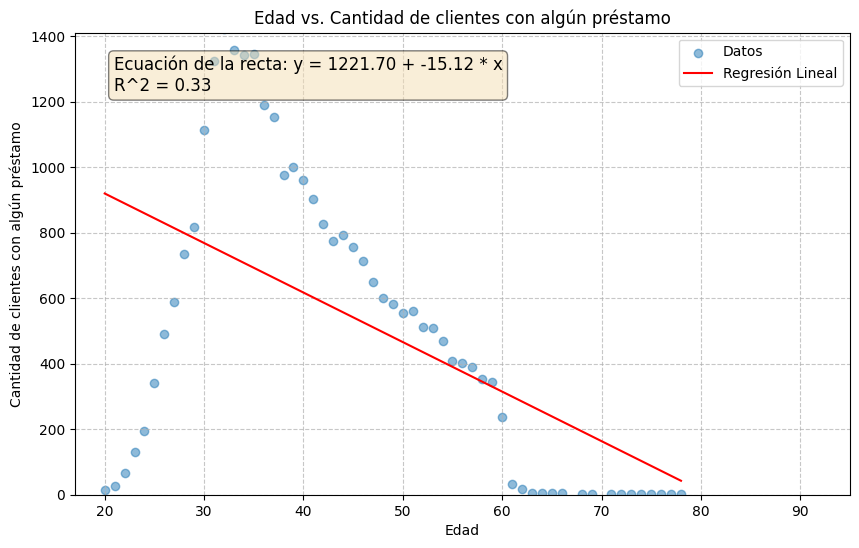

In [8]:
datos_filtrados = datos[(datos['loan'] == 'yes') | (datos['housing'] == 'yes')]
# Agrupar datos filtrados por edad y contar cantidad de clientes
datos_agrupados = datos_filtrados.groupby('age').size()

# variables para regresión lineal
X = sm.add_constant(datos_agrupados.index)
y = datos_agrupados.values

# Crear y ajustar modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Imprimir resumen del modelo
print(results.summary())

# Obtener ecuación de la recta de regresión
eq_recta = f'Ecuación de la recta: y = {results.params[0]:.2f} + {results.params[1]:.2f} * x'

# Crear gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(datos_agrupados.index, datos_agrupados.values, alpha=0.5, label='Datos')
x_line = np.linspace(min(datos_agrupados.index), max(datos_agrupados.index), 100)
y_line = results.params[0] + results.params[1] * x_line
plt.plot(x_line, y_line, 'r-', label='Regresión Lineal')
plt.title('Edad vs. Cantidad de clientes con algún préstamo')
plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes con algún préstamo')
plt.xlim(17, 95)
plt.ylim(0, 1410)

# Mostrar información sobre el gráfico en la leyenda
info_text = f"{eq_recta}\nR^2 = {round(results.rsquared, 2)}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     41.49
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.02e-08
Time:                        08:46:11   Log-Likelihood:                -505.71
No. Observations:                  77   AIC:                             1015.
Df Residuals:                      75   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        545.2029     53.770     10.140      0.0

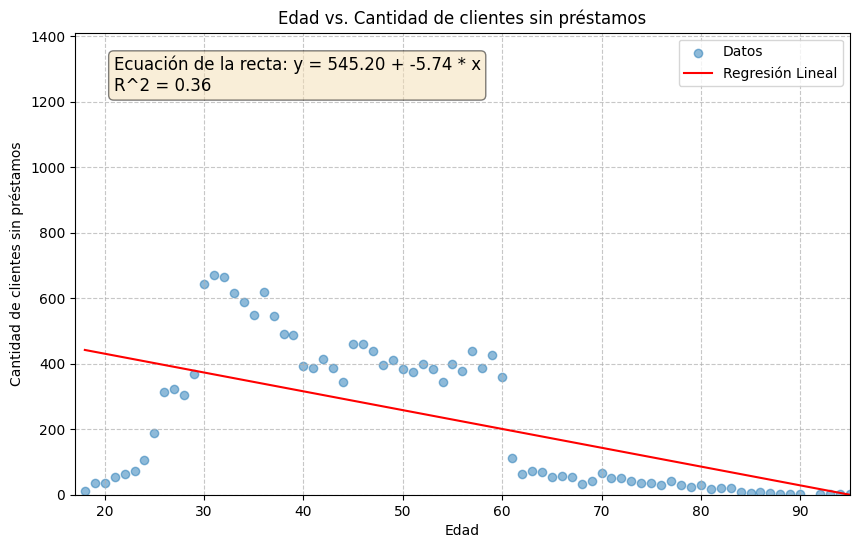

In [9]:
# Filtrar los datos para clientes sin préstamos personales ni hipotecarios
datos_filtrados = datos[(datos['loan'] == 'no') & (datos['housing'] == 'no')]

# Agrupar datos filtrados por edad y contar cantidad de clientes
datos_agrupados = datos_filtrados.groupby('age').size()

# variables para regresión lineal
X = sm.add_constant(datos_agrupados.index)
y = datos_agrupados.values

# Crear y ajustar modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Imprimir resumen del modelo
print(results.summary())

# Obtener ecuación de la recta de regresión
eq_recta = f'Ecuación de la recta: y = {results.params[0]:.2f} + {results.params[1]:.2f} * x'

# Crear gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(datos_agrupados.index, datos_agrupados.values, alpha=0.5, label='Datos')
x_line = np.linspace(min(datos_agrupados.index), max(datos_agrupados.index), 100)
y_line = results.params[0] + results.params[1] * x_line
plt.plot(x_line, y_line, 'r-', label='Regresión Lineal')
plt.title('Edad vs. Cantidad de clientes sin préstamos')
plt.xlabel('Edad')
plt.ylabel('Cantidad de clientes con sin préstamos')
plt.xlim(17, 95)
plt.ylim(0, 1410)

# Mostrar información sobre el gráfico en la leyenda
info_text = f"{eq_recta}\nR^2 = {round(results.rsquared, 2)}"
plt.text(0.05, 0.95, info_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()